## library yang digunakan

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Widnyana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## load dataset

In [176]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



([<matplotlib.axis.XTick at 0x27a1a5b5cd0>,
 [Text(0, 0, 'SMS Normal'),
  Text(1, 0, 'SMS Fraud / Penipuan'),
  Text(2, 0, 'SMS Promo')])

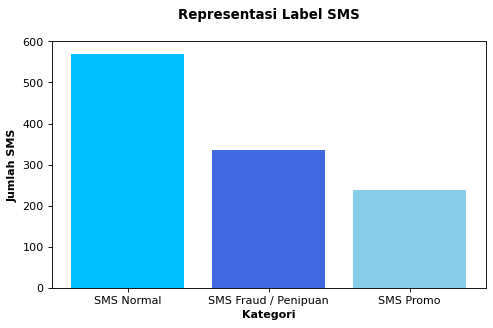

In [177]:
%matplotlib inline

print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Representasi Label SMS\n', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah SMS', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)


## Tetx Preprocessing

## Case Folding

In [178]:
import re

# membuat fungsi untuk case folding
def casefolding(text):
    text = text.lower()                                 # merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text)             # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text)                 # menghapus tanda baca
    text = text.strip()
    return text

In [179]:
# membandingkan before dan after case folding
raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t : ',raw_sample)
print('Case Folding\t :', case_folding)

Raw data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub


## Word Normalization

In [180]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in text.split()
    ])

    text = str.lower(text)
    return text

In [181]:
# membandingkan before dan after word normalization

raw_data = data['teks'].iloc[696]
word_normal = text_normalize(case_folding)

print('Raw Data\t :', raw_data)
print('Word Normalize\t :', word_normal)

Raw Data	 : Btw magicomnya yg sedang Gais, gaada yg gede
Word Normalize	 : pelanggan yang terhormat sisa kuota flash anda kb download mytelkomsel apps di untuk cek kuotabeli paket flash atau hubungi


## filtering (Stopword Removal)

In [182]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [183]:
len(stopwords_ind)

758

In [184]:
# melihat daftar stopword dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [185]:
# membuat fungsi stopword removal

# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [186]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('Stopword Reomoval \t\t', stopword_removal)

Raw Data 		 : Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 : btw magicomnya yg sedang gais gaada yg gede
Stopword Reomoval 		 magicomnya yg gais gaada yg gede


## Stemming

In [187]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [188]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('Stopword Removal \t\t :', stopword_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Btw magicomnya yg sedang Gais, gaada yg gede
Case Folding 		 : btw magicomnya yg sedang gais gaada yg gede
Stopword Removal 		 : magicomnya yg gais gaada yg gede
Stemming 		 : magicomnya yg gais gaada yg gede


## text preprocessing pipeline

In [189]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [190]:
%%time
data['clean_teks']= data['teks'].apply(text_preprocessing_process)

Wall time: 4min 10s


In [191]:
data

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash my telkomsel app extra ...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,langgan hormat sisa kuota flash kb download my...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,langgan hormat sisa kuota flash kb download my...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,rupiah ribu spesial pilih aktif buru skb
...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer


In [192]:
# simpan data yang sudah dipreprocessing ke dalam file csv
data.to_csv('clean_data.csv')

# Frekuensi Kata Tertinggi di setiap kelas

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words_count_matrix = cv.fit_transform(data['teks'])

# Konversi matriks sparse menjadi DataFrame jarang
count_vect = pd.DataFrame.sparse.from_spmatrix(words_count_matrix, columns=cv.get_feature_names_out())


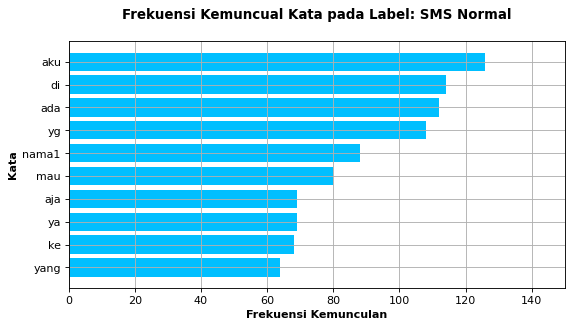

In [194]:
#SMS Normal
normal_words = count_vect[data.label == 0]
normal_words_count = normal_words.sum()
indices = np.argsort(normal_words_count)[::-1][:10]
normal_words_count = normal_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(normal_words_count)),
         normal_words_count.values, 
         color='deepskyblue')
plt.yticks(np.arange(len(normal_words_count)), normal_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemuncual Kata pada Label: SMS Normal\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()

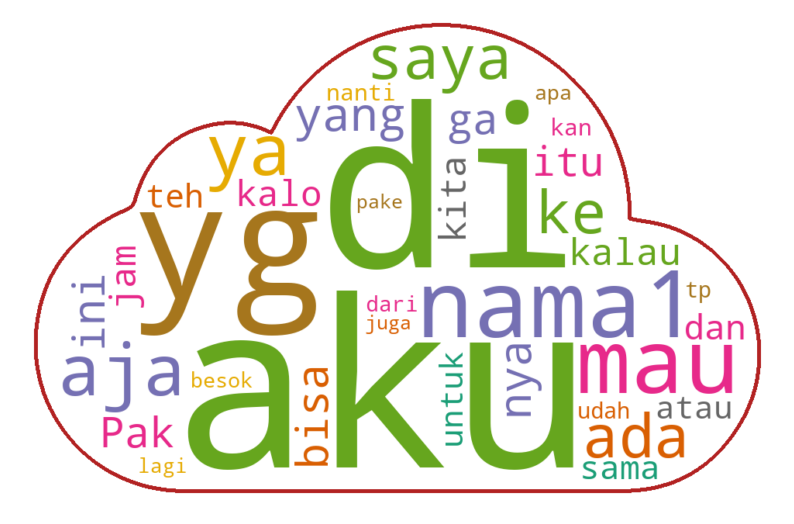

In [195]:
import cv2

originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# WordCloud Label SMS Normal
sms_normal = data[data.label == 0]
normal_string = []
for t in sms_normal.teks:
    normal_string.append(t)
normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

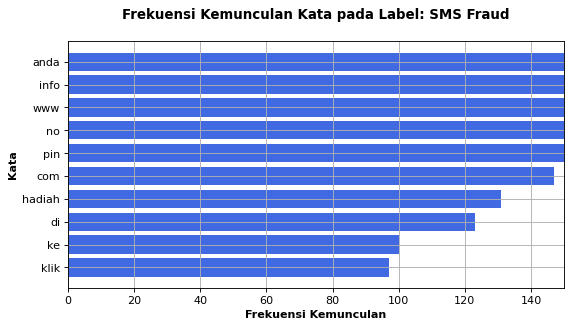

In [196]:
# SMS Fraud
fraud_words = count_vect[data.label == 1]
fraud_words_count = fraud_words.sum()
indices = np.argsort(fraud_words_count)[::-1][:10]
fraud_words_count = fraud_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(fraud_words_count)),
         fraud_words_count.values, 
         color='royalblue')
plt.yticks(np.arange(len(fraud_words_count)), fraud_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label: SMS Fraud\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()


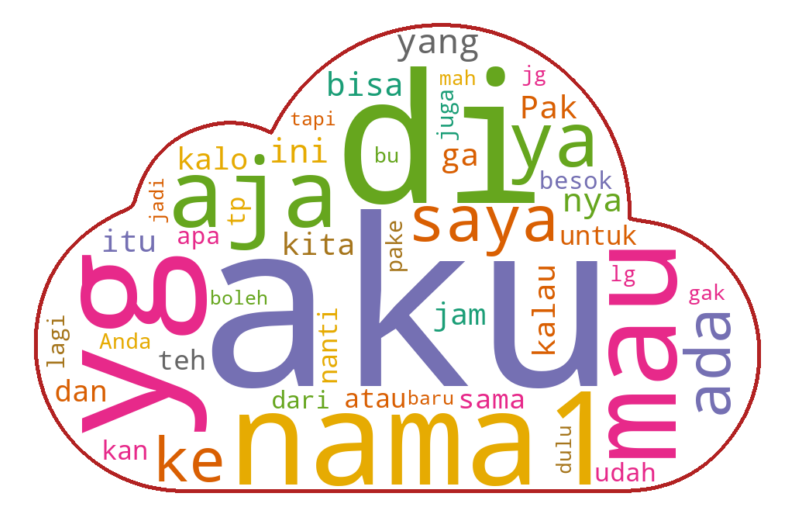

In [197]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# WordCloud Label SMS Normal
sms_normal = data[data.label == 0]
normal_string = []
for t in sms_normal.teks:
    normal_string.append(t)
normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

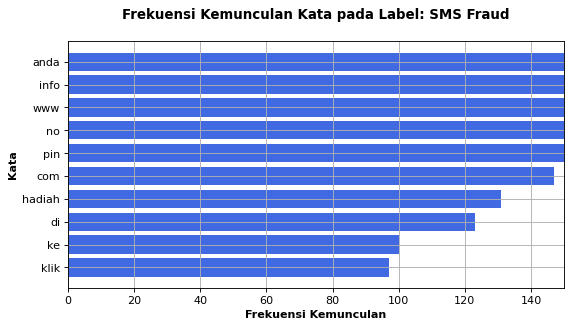

In [198]:
# SMS Fraud
fraud_words = count_vect[data.label == 1]
fraud_words_count = fraud_words.sum()
indices = np.argsort(fraud_words_count)[::-1][:10]
fraud_words_count = fraud_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(fraud_words_count)),
         fraud_words_count.values, 
         color='royalblue')
plt.yticks(np.arange(len(fraud_words_count)), fraud_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label: SMS Fraud\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()

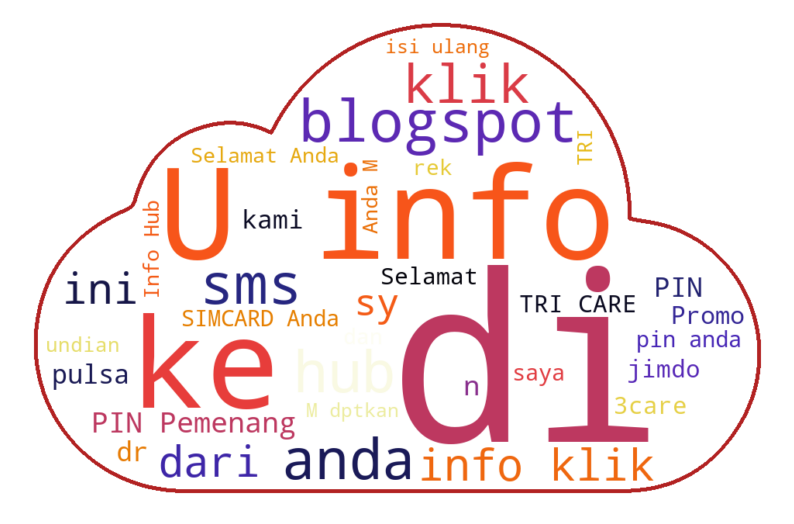

In [199]:
# WordCloud Label SMS Fraud / Penipuan
sms_fraud = data[data.label == 1]
fraud_string = []
for t in sms_fraud.teks:
    fraud_string.append(t)
fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='CMRmap',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

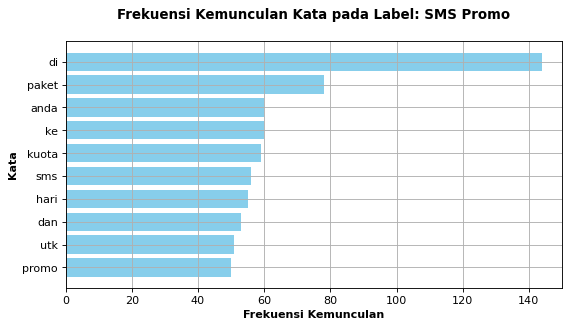

In [200]:
# SMS Promo
promo_words = count_vect[data.label == 2]
promo_words_count = promo_words.sum()
indices = np.argsort(promo_words_count)[::-1][:10]
promo_words_count = promo_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(promo_words_count)),
         promo_words_count.values, 
         color='skyblue')
plt.yticks(np.arange(len(promo_words_count)), promo_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemunculan Kata pada Label: SMS Promo\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()


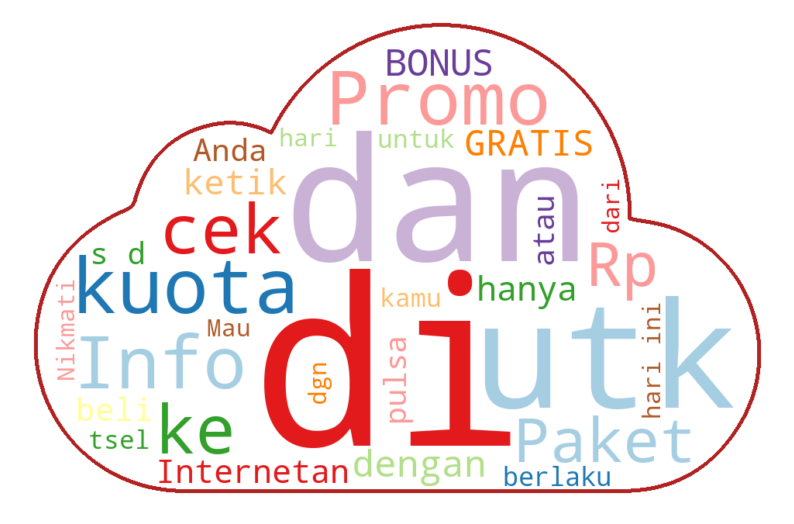

In [201]:
sms_promo = data[data.label == 2]
promo_string = []
for t in sms_promo.teks:
    promo_string.append(t)
promo_string = pd.Series(promo_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Paired',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(promo_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Eksplor kata-kata yang paling sering muncul dan paling jarang muncul

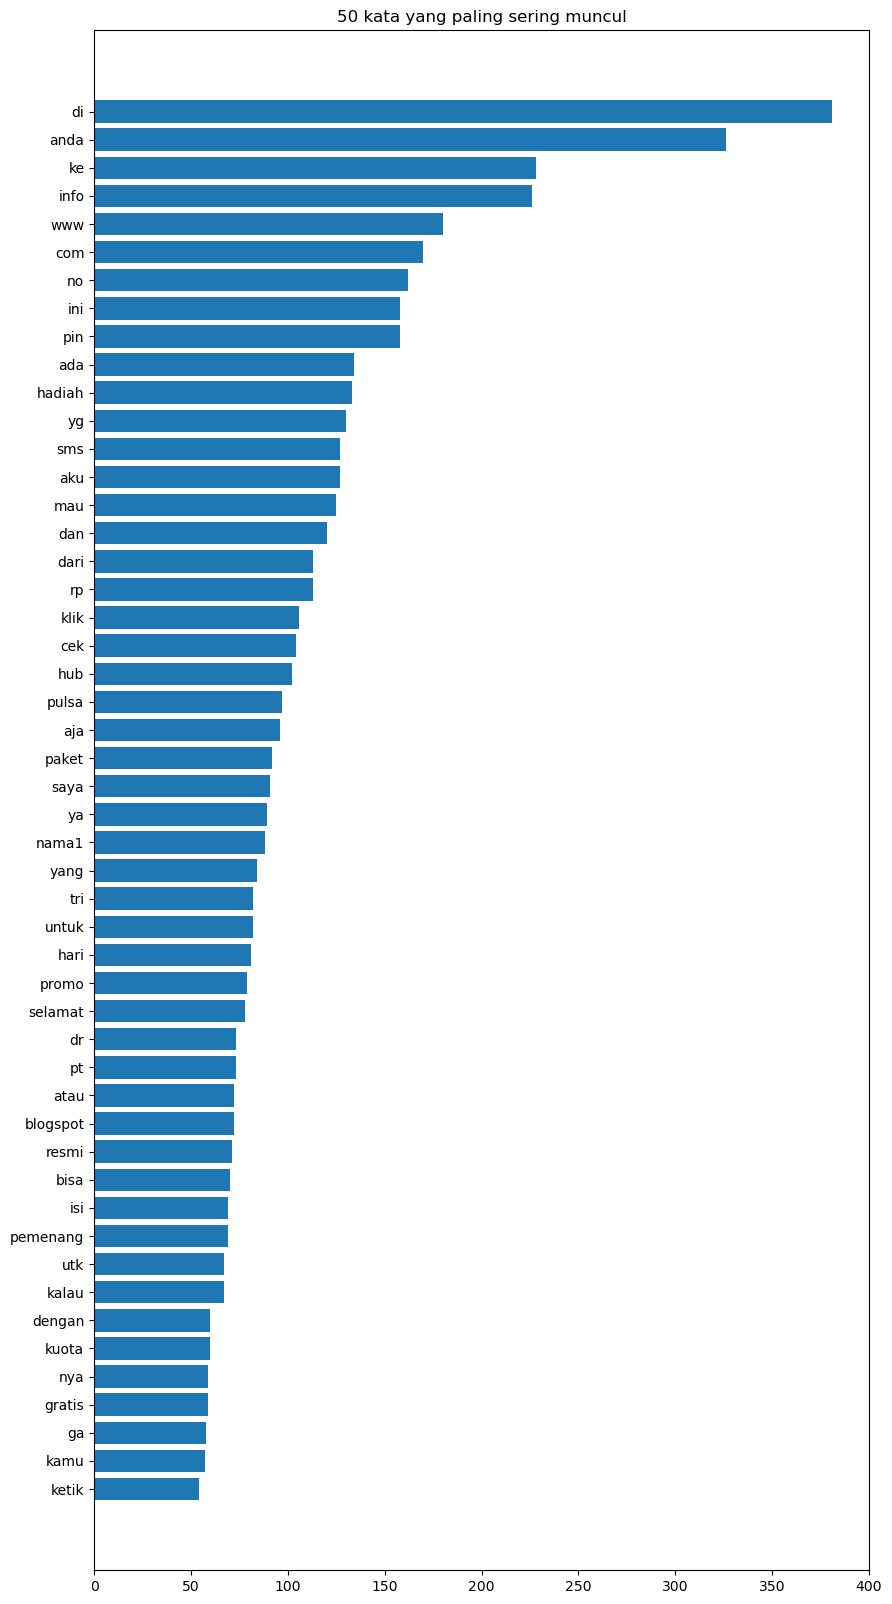

In [202]:
all_word_count = count_vect[data.label < 3].sum()
indices = np.argsort(all_word_count)[::-1][:50]
all_word_count = all_word_count[indices]

plt.figure(figsize=(10, 20))
plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
plt.gca().invert_yaxis()
plt.title('50 kata yang paling sering muncul')
plt.show()

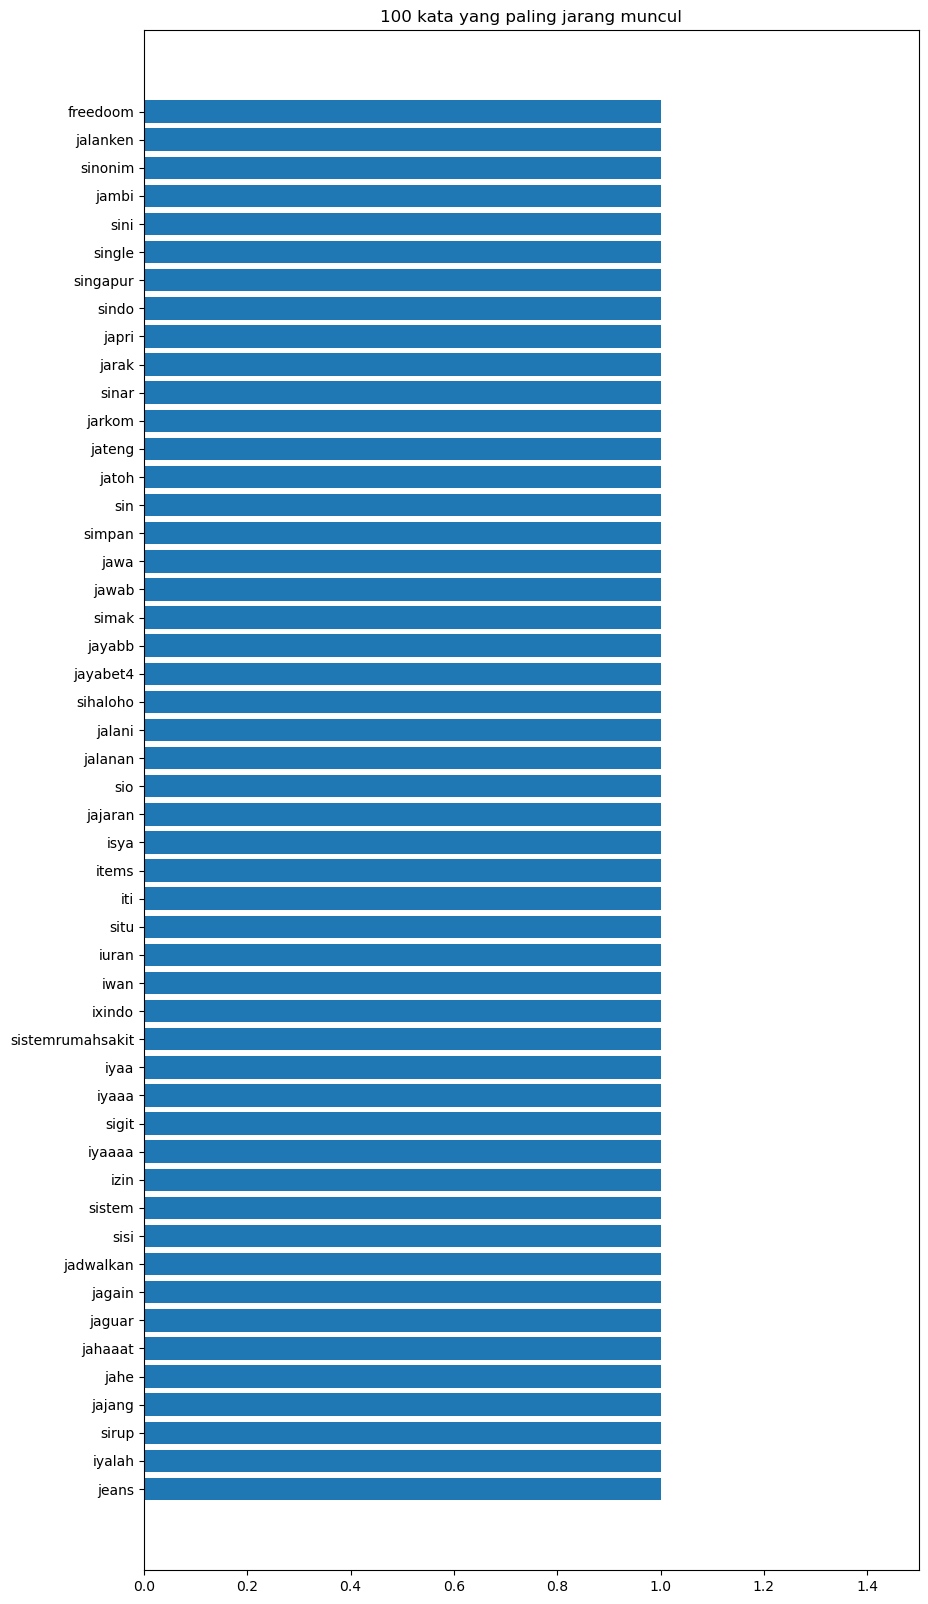

In [203]:
all_word_count = count_vect[data.label < 3].sum()
indices = np.argsort(all_word_count)[:50]
all_word_count = all_word_count[indices]

plt.figure(figsize=(10, 20))
plt.xlim(0,1.5)
plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
plt.gca().invert_yaxis()
plt.title('100 kata yang paling jarang muncul')
plt.show()

In [204]:
all_word_count = count_vect[data.label < 3].sum()

In [205]:
too_common_words = list(filter(lambda w: all_word_count[w] > 1000, all_word_count.keys()))
common_words = list(filter(lambda w: all_word_count[w] > 75, all_word_count.keys()))
too_rare_words = list(filter(lambda w: all_word_count[w] < 20, all_word_count.keys()))

In [206]:
len(common_words)

33

In [207]:
len(too_rare_words)

4786

In [208]:
len(all_word_count.keys())

4951

## Feature Engineering

In [209]:
# pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label'] 

In [210]:
x

0       promo beli paket flash my telkomsel app extra ...
1       rupiah ribu spesial pilih aktif promo sd novem...
2       langgan hormat sisa kuota flash kb download my...
3       langgan hormat sisa kuota flash kb download my...
4                rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                           yooo oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141        nama beaok bwrangkat pagimau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [211]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

## Feature Extraction (TF-IDF dan N-Gram)

In [212]:
# save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [213]:
# menampilkan vocabulary dari tif-idf
vec_TF_IDF.vocabulary_

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2875,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2878,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3013,
 'sk': 2691,
 'rupiah': 2503,
 'ribu': 2452,
 'spesial': 2750,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2557,
 'november': 1989,
 'langgan': 1577,
 'hormat': 1116,
 'sisa': 2684,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2692,
 'ekstra': 804,
 'pulsa': 2332,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2690,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2841,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2869,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3129,
 'ultima': 3066,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2843,
 'tselmefl': 3011,
 'coboy': 568,
 'jr': 1329

In [214]:
# melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names()))

3253


c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [215]:
# melihat fitur apa saja yang ada di dalam corpus
print(vec_TF_IDF.get_feature_names())

['aa', 'aamiiiin', 'aamiin', 'ab', 'abadi', 'abai', 'abbee', 'abdul', 'acara', 'acaratks', 'account', 'ada', 'adapromo', 'adi', 'adik', 'adison', 'admin', 'administrasi', 'adminlte', 'ado', 'adrian', 'adu', 'aduh', 'advertising', 'aea', 'aesthetic', 'afbe', 'affc', 'afr', 'afrika', 'agam', 'agen', 'agendain', 'agenpulsa', 'ags', 'agst', 'agsts', 'agt', 'agtskinfodlj', 'agua', 'agun', 'agus', 'agust', 'agustus', 'agustuskunjungi', 'ah', 'ahaha', 'ahub', 'aidzin', 'aigoo', 'air', 'aja', 'ajaa', 'ajaaa', 'ajabri', 'ajak', 'ajakin', 'ajar', 'ajeng', 'akademik', 'akang', 'akangteteh', 'akbar', 'akreditasi', 'akses', 'aksi', 'aktif', 'aktifasi', 'aktivasi', 'aktivitas', 'akucintaislam', 'akumulasi', 'akun', 'akurasi', 'akurat', 'ala', 'alaikum', 'alaikumsaya', 'alaiqum', 'alam', 'alamat', 'alami', 'alamsyah', 'alat', 'alesannya', 'algoritma', 'alhamdulillah', 'alhamdullilah', 'alhuda', 'ali', 'aliando', 'all', 'allah', 'allahaamiin', 'alphard', 'alquran', 'alur', 'aman', 'amanda', 'ambil', '

In [216]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
data_tabular_tf_idf.iloc[10:20,60:70]

,akang,akangteteh,akbar,akreditasi,akses,aksi,aktif,aktifasi,aktivasi,aktivitas
10,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.000000,0.0,0.149444,0.0,0.000000,0.0
12,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
13,0.0,0.0,0.0,0.0,0.262305,0.0,0.000000,0.0,0.000000,0.0
14,0.0,0.0,0.0,0.0,0.000000,0.0,0.244053,0.0,0.382416,0.0
15,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
16,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
17,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
18,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
19,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


## Feature Selection

In [218]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [219]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=3000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced features
print('Original Feature Number', x_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

Original Feature Number 3253
Reduced feature Number 3000


In [220]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.835608
1,0.419698
2,1.558607
3,0.716455
4,0.800674
...,...
3248,1.180239
3249,0.503162
3250,0.716455
3251,2.918739


In [221]:
# menampilkan feature beserta nilainya

feature = vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

c:\Users\Widnyana\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.835608,aa
1,0.419698,aamiiiin
2,1.558607,aamiin
3,0.716455,ab
4,0.800674,abadi
...,...,...
3248,1.180239,zalora
3249,0.503162,zarkasi
3250,0.716455,zjt
3251,2.918739,zona


In [222]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2088,49.080686,paket
1030,46.356893,hadiah
1549,45.614332,kuota
2178,39.469258,pin
1486,34.488003,klik
...,...,...
1520,0.044714,kopi
307,0.044468,bca
1694,0.031579,maksimal
531,0.013783,cepat


In [223]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [224]:
# menampilkan fitur yang terpilih berdasarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahub',
 'aidzin',
 'aigoo',
 'air',
 'aja',
 'ajaa',
 'ajaaa',
 'ajabri',
 'ajak',
 'ajeng',
 'akang',
 'akangteteh',
 'akbar',
 'akreditasi',
 'akses',
 'aksi',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivitas',
 'akucintaislam',
 'akumulasi',
 'akun',
 'akurasi',
 'akurat',
 'alaikum',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alamsyah',
 'alesannya',
 'algoritma',
 'alhamdulillah',
 'alhuda',
 'ali',
 'aliando',
 'all',
 'allah',
 'allahaamiin',
 'alphard',
 'alquran',
 'alur',
 'aman',
 'amanda',
 'ambil',
 'amin',


In [225]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'promo': 2295,
 'beli': 323,
 'paket': 2088,
 'flash': 870,
 'my': 1880,
 'telkomsel': 2875,
 'app': 162,
 'extra': 841,
 'kuota': 1549,
 'lte': 1652,
 'telpon': 2878,
 'mnthr': 1831,
 'buru': 480,
 'cek': 521,
 'tselmemytsel': 3013,
 'sk': 2691,
 'rupiah': 2503,
 'ribu': 2452,
 'spesial': 2750,
 'pilih': 2175,
 'aktif': 66,
 'sd': 2557,
 'november': 1989,
 'langgan': 1577,
 'hormat': 1116,
 'sisa': 2684,
 'kb': 1410,
 'download': 752,
 'mytelkomsel': 1882,
 'apps': 167,
 'kuotabeli': 1550,
 'hubung': 1140,
 'skb': 2692,
 'ekstra': 804,
 'pulsa': 2332,
 'internet': 1220,
 'bulan': 466,
 'sjk': 2690,
 'augsept': 217,
 'detail': 665,
 'iring': 1242,
 'tarif': 2841,
 'panjang': 2101,
 'hits': 1105,
 'armada': 180,
 'curi': 600,
 'hati': 1069,
 'tekan': 2869,
 'okcall': 2041,
 'informasi': 1191,
 'eks': 801,
 'loh': 1639,
 'internetan': 1221,
 'pakai': 2086,
 'volume': 3129,
 'ultima': 3066,
 'mbhr': 1738,
 'harga': 1057,
 'tariflokasi': 2843,
 'tselmefl': 3011,
 'coboy': 568,
 'jr': 1329

In [226]:
len(new_selected_feature)

3000

In [227]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

In [228]:
# menampilkan fitur-fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acaratks,account,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling dengan Naive Bayes

In [229]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
#import library

import random
from sklearn.model_selection import train_test_split

#import algoritma navive bayes
from sklearn.naive_bayes import MultinomialNB

In [231]:
#Pembagian data training dan testing
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [232]:
#Print jumlah data training dan testing

print('Jumlah X traning data : ', len(x_train))
print('Jumlah X testing data : ', len(x_test))
print('Jumlah Y traning data : ', len(y_train))
print('Jumlah X testing data : ', len(y_test))

Jumlah X traning data :  914
Jumlah X testing data :  229
Jumlah Y traning data :  914
Jumlah X testing data :  229


In [233]:
#Proses traning menggunakan Naive Bayes

text_algorithm = MultinomialNB()


In [234]:
model = text_algorithm.fit(x_train, y_train)

In [235]:
# membuat model prediksi deteksi jenis SMS

data_input = ("beli paket flash my telkomsel app extra kuota lte extra telpon mnthr buru cek tselmemytsel sk")
data_input = text_preprocessing_process(data_input)

#load 
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]))

if(hasil ==0):
    s = "SMS Normal"
elif(hasil ==1):
    s = "SMS Penipuan"
else:
    s = "SMS Promo"
    
print("Hasil Prediksi : ", s)


Hasil Prediksi :  SMS Promo


# Tahap Validasi dan Evaluasi

In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)

CM = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       126
           1       0.89      0.89      0.89        66
           2       0.84      0.86      0.85        37

    accuracy                           0.92       229
   macro avg       0.90      0.90      0.90       229
weighted avg       0.92      0.92      0.92       229



In [237]:
# Simpan Model

pickle.dump(model, open("model_fraud.sav", "wb"))